## $Interaction$ $plot$: $Test$ $dimension$ $reduction$ $using$ $principal$ $components.$

In [1]:
%config IPCompleter.greedy=True
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from skimage import data

In [3]:
from __future__ import division

## $Theory \ldots$

Let the original image $\mathbf{X} \in \mathbb{R}^{n \times m}$ where $n$ is the number of variables and $m$ is the number of observations.

In [4]:
X = data.camera()
print("Original image X has dimensions: {}".format(X.shape))

Original image X has dimensions: (512L, 512L)


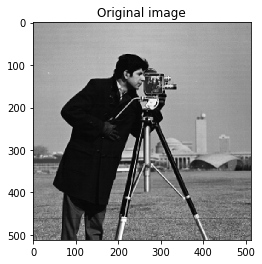

In [5]:
plt.imshow(X, cmap='gray')
plt.title('Original image');

Covariance matrix $ \mathbf{\Sigma}_X \in \mathbb{R}^{n \times n}$

In [6]:
cov = np.cov(X.T)
print("Covariance matrix has dimensions: {}".format(cov.shape))

Covariance matrix has dimensions: (512L, 512L)


Let $\mathbf{\Lambda} \in \mathbb{R}^{n \times n}$ be the diagonal matrix of eigenvalues and $\mathbf{V} \in \mathbb{R}^{n \times n}$ be the orthogonal matrix of eigenvectors.

Then, the eigendecomposition of $\mathbf{\Sigma_{X}} = \mathbf{V} \mathbf{\Lambda} \mathbf{V}^{-1}$

Since $\mathbf{\Sigma_{X}}$ is symmetric, a special case of eigendecomposition is $\mathbf{\Sigma_{X}} = \mathbf{V} \mathbf{\Lambda} \mathbf{V}^T$

numpy's covariance function returns $\Lambda^\prime$ and $\mathbf{V}$ where $\Lambda^\prime \in \mathbb{R}^n$ are the diagonals of $\mathbf{\Lambda}$ 

Another approach to eigendecomposition is Singular Value Decomposition $ \mathbf{\Sigma_{X}} = \mathbf{U} \mathbf{D} \mathbf{V}^T $
  -  $ \mathbf{U} \in \mathbb{R}^{n \times n} $ is an orthonormal basis for the space spanned by the column vectors of $ \mathbf{\Sigma_{X}}$.
  -  $ \mathbf{V} \in \mathbb{R}^{m \times m} $ is an orthonormal basis for the space spanned by the row vectors of $ \mathbf{\Sigma_{X}} $.
  -  $ \mathbf{D} \in \mathbb{R}^{n \times m} $ is a diagonal matrix and the diagonal values are the square roots of the eigenvalues of $ \mathbf{\Sigma_{X}} $.
  -  The columns of $ \mathbf{V} $ are the eigenvectors of $ \mathbf{\Sigma_{X}}$.


In [7]:
eigenvalues, eigenvectors = np.linalg.eigh(cov)
print("Dimensions of eigenvectors: {}".format(eigenvectors.shape))
eigenvalues = eigenvalues[::-1]
eigenvectors = eigenvectors[:,::-1]

Dimensions of eigenvectors: (512L, 512L)


Linear transformation $\mathbf{P} = \mathbf{V}^T \mathbf{X}$ $\implies$ original image $\mathbf{V}\mathbf{P} = \mathbf{X}$

Define $\mathbf{X}^\prime := \mathbf{V}_r \mathbf{P}_r$ where $\mathbf{V}_r \in \mathbb{R}^{n \times r} \subset \mathbb{R}^{n \times n}$ is the reduced matrix restricted to the first $r$ eigenvectors and $\mathbf{P}_r \in \mathbb{R}^{r \times n} \subset \mathbb{R}^{n \times n}$.

In [8]:
P = eigenvectors.T.dot(X)
X_prime = eigenvectors.dot(P)

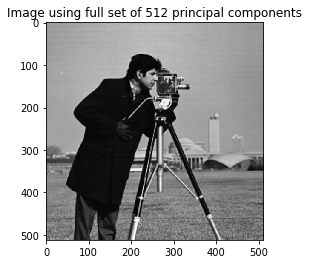

In [9]:
plt.imshow(X_prime, cmap='gray')
plt.title('Image using full set of 512 principal components');

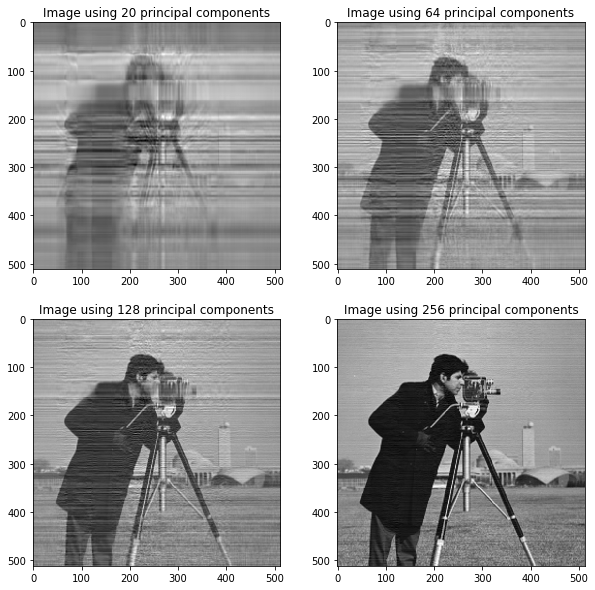

In [10]:
_, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

ax1.imshow(eigenvectors[:,0:20-1].dot(P[0:20-1,:]), cmap='gray')
ax1.set(title='Image using 20 principal components')

ax2.imshow(eigenvectors[:,0:64-1].dot(P[0:64-1,:]), cmap='gray')
ax2.set(title='Image using 64 principal components')

ax3.imshow(eigenvectors[:,0:128-1].dot(P[0:128-1,:]), cmap='gray')
ax3.set(title='Image using 128 principal components');

ax4.imshow(eigenvectors[:,0:256-1].dot(P[0:256-1,:]), cmap='gray')
ax4.set(title='Image using 256 principal components');

## $Comparison$ $with$ $scikit$-$learn$ $\ldots$

In [11]:
pca = PCA(n_components = len(cov))
transformation = pca.fit_transform(X)

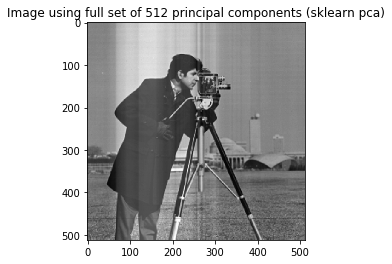

In [12]:
eigenvectors_sk = pca.components_
img_sk = transformation.dot(eigenvectors_sk)
plt.imshow(img_sk, cmap='gray')
plt.title('Image using full set of 512 principal components (sklearn pca)');

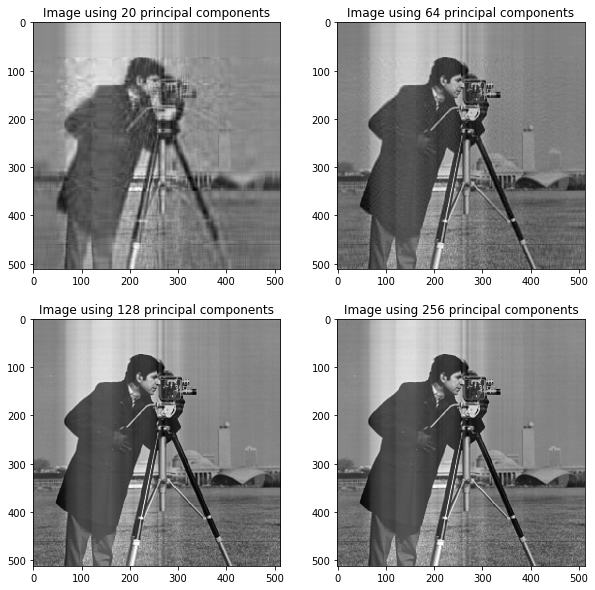

In [13]:
_, ((ax1_1, ax2_1), (ax3_1, ax4_1)) = plt.subplots(2, 2, figsize=(10, 10))

ax1_1.imshow(transformation[:,0:20-1].dot(eigenvectors_sk[0:20-1,:]), cmap='gray')
ax1_1.set(title='Image using 20 principal components')

ax2_1.imshow(transformation[:,0:64-1].dot(eigenvectors_sk[0:64-1,:]), cmap='gray')
ax2_1.set(title='Image using 64 principal components')

ax3_1.imshow(transformation[:,0:128-1].dot(eigenvectors_sk[0:128-1,:]), cmap='gray')
ax3_1.set(title='Image using 128 principal components');

ax4_1.imshow(transformation[:,0:256-1].dot(eigenvectors_sk[0:256-1,:]), cmap='gray')
ax4_1.set(title='Image using 256 principal components');

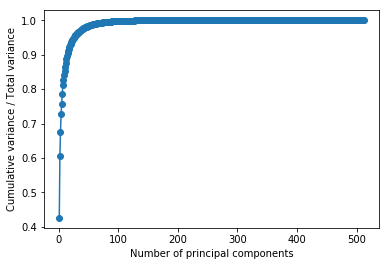

In [14]:
plt.xlabel('Number of principal components'), plt.ylabel('Cumulative variance / Total variance')
plt.plot(np.arange(1, len(cov)+1), np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_), marker='o');

In [15]:
summary_df = pd.DataFrame({'Eigenvalues':pca.explained_variance_}, index=np.arange(1, len(cov)+1))
summary_df['Proportion'] = summary_df/np.sum(summary_df)
summary_df['Cumulative'] = np.cumsum(summary_df['Proportion'])
summary_df.head(10)

,Eigenvalues,Proportion,Cumulative
1,628073.693334,0.425907,0.425907
2,264907.268211,0.179638,0.605545
3,103581.579431,0.070240,0.675785
4,75185.907338,0.050985,0.726770
5,46328.318577,0.031416,0.758186
6,41295.657689,0.028003,0.786190
7,36668.648797,0.024866,0.811055
8,22477.479666,0.015242,0.826297
9,21783.806441,0.014772,0.841069
10,18237.572677,0.012367,0.853437


## $Interaction \ldots$

In [16]:
import ipywidgets as widgets

In [17]:
def generate_img_with_x_pcs(x):
    plt.imshow(eigenvectors[:,0:x-1].dot(P[0:x-1,:]), cmap='gray', aspect='auto')
    plt.title('Image using {} principal components'.format(x));
    return x

In [18]:
widgets.interact(generate_img_with_x_pcs, x=widgets.IntSlider(min=1, max=len(cov), step=10, value=100));

A Jupyter Widget